Learned parameters: [3.77225153 3.16934201 2.17748352]


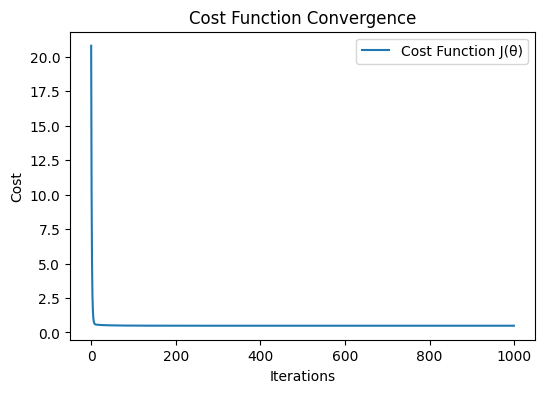

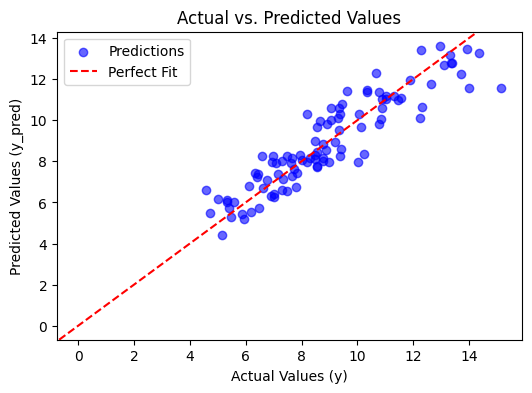

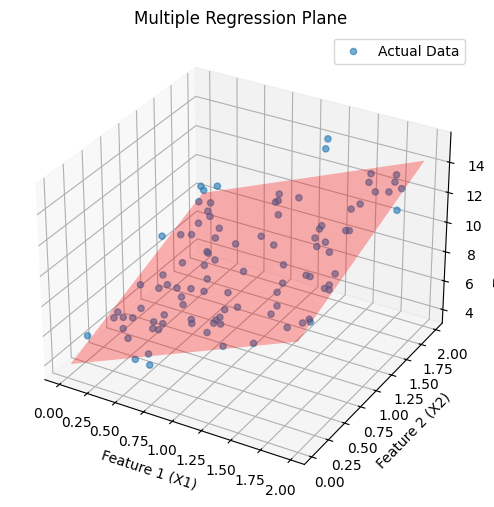

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#  Generate Synthetic Data (3 Features)
np.random.seed(42)
m = 100  # Number of examples
X = 2 * np.random.rand(m, 2)  # 2 independent variables
theta_true = np.array([4, 3, 2])  # True parameters (θ0=4, θ1=3, θ2=2)
X_b = np.c_[np.ones((m, 1)), X]  # Add bias term (column of ones for θ0)
y = X_b.dot(theta_true) + np.random.randn(m)  # Linear equation with noise

#  Cost Function (Mean Squared Error)
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)  # h(X) = Xθ
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)  # MSE
    return cost

# Gradient Descent Algorithm
def gradient_descent(X, y, alpha=0.1, iterations=1000):
    m, n = X.shape  # Number of examples and features
    theta = np.zeros(n)  # Initialize parameters
    cost_history = []  # Store cost function values

    for _ in range(iterations):
        gradients = (1/m) * X.T.dot(X.dot(theta) - y)  # Compute gradients
        theta -= alpha * gradients  # Update parameters
        cost_history.append(compute_cost(X, y, theta))  # Track cost

    return theta, cost_history

#  Train the Model
theta_learned, cost_history = gradient_descent(X_b, y)
print(f"Learned parameters: {theta_learned}")

# Plot Cost Function Convergence
plt.figure(figsize=(6, 4))
plt.plot(range(len(cost_history)), cost_history, label="Cost Function J(θ)")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Convergence")
plt.legend()
plt.show()

# Plot Actual vs. Predicted Values
y_pred = X_b.dot(theta_learned)  # Predictions
plt.figure(figsize=(6, 4))
plt.scatter(y, y_pred, color="blue", alpha=0.6, label="Predictions")
plt.xlabel("Actual Values (y)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs. Predicted Values")
plt.axline((0, 0), slope=1, color='red', linestyle="--", label="Perfect Fit")
plt.legend()
plt.show()

#  3D Plot of Regression Plane (Only if X has 2 features)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

# Scatter plot of data points
ax.scatter(X[:, 0], X[:, 1], y, label="Actual Data", alpha=0.6)

# Create a mesh grid for the regression plane
X1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 10)
X2_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 10)
X1_mesh, X2_mesh = np.meshgrid(X1_range, X2_range)
Y_pred_mesh = theta_learned[0] + theta_learned[1] * X1_mesh + theta_learned[2] * X2_mesh

# Plot the regression plane
ax.plot_surface(X1_mesh, X2_mesh, Y_pred_mesh, color="red", alpha=0.3)

ax.set_xlabel("Feature 1 (X1)")
ax.set_ylabel("Feature 2 (X2)")
ax.set_zlabel("Target Variable (y)")
ax.set_title("Multiple Regression Plane")

plt.legend()
plt.show()
